# PREDICTING PRICES OF HOUSES IN NIGERIA

**DATA SOURCE**
- House prices: https://www.kaggle.com/datasets/abdullahiyunus/nigeria-houses-and-prices-dataset

In [1]:
# import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings

from glob import glob #library that helps us search for files

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, PowerTransformer,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.feature_selection import RFE


warnings.simplefilter(action="ignore")
pd.pandas.set_option('display.max_rows',None)
pd.pandas.set_option('display.max_columns',None)
from sklearn.feature_selection import VarianceThreshold
#pd.options.display.float_format = '{:20,.2f}'.format


In [2]:
#importing dataset

data=pd.read_csv("/Users/USER/Documents/DATASETS/nigeria_houses_data.csv")

In [3]:
data.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [4]:
data.drop_duplicates(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13888 entries, 0 to 24324
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       13888 non-null  float64
 1   bathrooms      13888 non-null  float64
 2   toilets        13888 non-null  float64
 3   parking_space  13888 non-null  float64
 4   title          13888 non-null  object 
 5   town           13888 non-null  object 
 6   state          13888 non-null  object 
 7   price          13888 non-null  float64
dtypes: float64(5), object(3)
memory usage: 976.5+ KB


In [6]:
data.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,13888.000000,13888.000000,13888.000000,13888.000000,1.388800e+04
mean,4.185412,4.516993,4.997264,4.072725,4.002137e+08
std,1.317457,1.360651,1.424560,1.638640,1.614926e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,3.000000,4.000000,4.000000,3.000000,3.800000e+07
50%,4.000000,5.000000,5.000000,4.000000,7.500000e+07
75%,5.000000,5.000000,6.000000,5.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


In [7]:
#the minimum house price is 90000, checking where it's located
data.min()

bedrooms                    1.0
bathrooms                   1.0
toilets                     1.0
parking_space               1.0
title            Block of Flats
town                        Aba
state                      Abia
price                   90000.0
dtype: object

In [8]:
data.max()

bedrooms                       9.0
bathrooms                      9.0
toilets                        9.0
parking_space                  9.0
title            Terraced Duplexes
town                    Yewa South
state                       Rivers
price              1800000000000.0
dtype: object

In [9]:
data.isnull().sum()
#checking for null values

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

In [10]:
#checking for whitespaces in columns
[i for i in data.columns if i.startswith(' ') or i.endswith(' ')]

[]

In [11]:
#checking for white spaces in data
np.where([data.apply(lambda x:x==' ')])

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [12]:
# SPLITTING DATA

train,test,=train_test_split(data,test_size=0.21,random_state=12)

In [13]:
train.shape,test.shape

((10971, 8), (2917, 8))

## EXPLORATORY DATA ANALYSIS 

**Categorical variables**

In [14]:
df=train.copy()

In [15]:
cat = df.select_dtypes('O')

In [16]:
for i in cat.columns:
    print(i,df[i].nunique())

title 7
town 179
state 24


Town and state have high cardinalities and will affect model performance if encoded. A solution to this is to replace the towns and state with their current population, remove values with low frequency, or target encoding.

**#univariate analysis of categorical variables**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

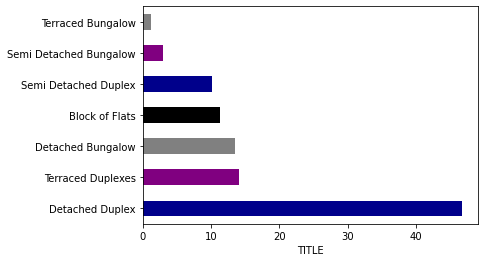

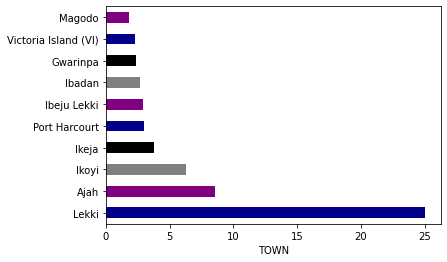

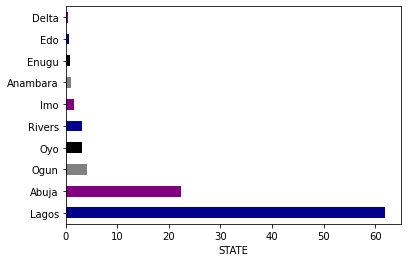

In [17]:
for i in cat:
    plt.figure()
    ax=((df[i].value_counts()*100/len(df)).head(10)).plot(kind='barh',color=['darkblue','purple','grey','k'])
    ax.set_xlabel(i.upper())

**Relationship between categorical variables and the target variable**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

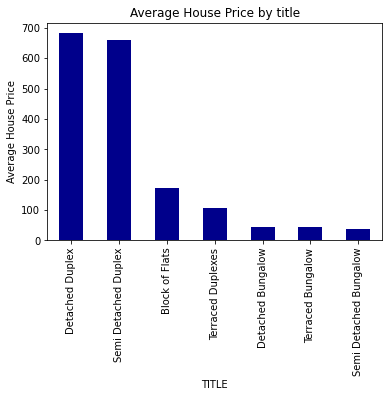

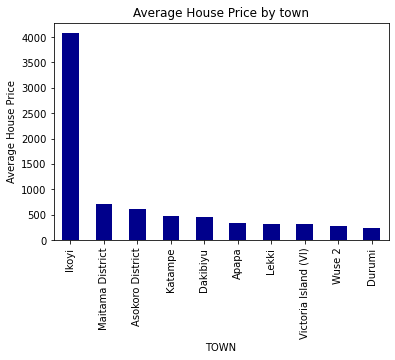

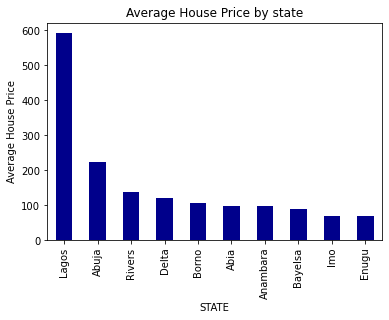

In [18]:
for i in cat.columns:
    plt.figure()
    (df.groupby(i)['price'].mean()/1e6).sort_values(ascending=False).head(10).plot.bar(color='darkblue')
    plt.xlabel(i.upper())
    plt.ylabel('Average House Price')
    plt.title(f'Average House Price by {i}');

In [19]:
print('Minimum House Price:',df['price'].min())
print('Maximum House Price:',df['price'].max())

Minimum House Price: 90000.0
Maximum House Price: 1800000000000.0


**Numerical variables**

In [20]:
num=df.select_dtypes('number')
num[:3]

,bedrooms,bathrooms,toilets,parking_space,price
23482,3.0,3.0,3.0,3.0,18000000.0
23662,6.0,5.0,5.0,4.0,150000000.0
1443,9.0,9.0,9.0,4.0,550000000.0


**#relationship between discrete features and the target variable**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

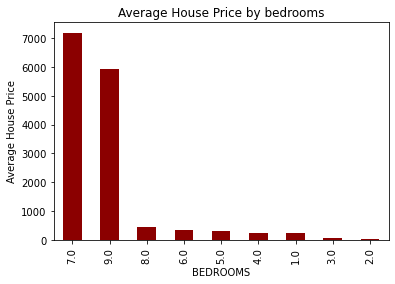

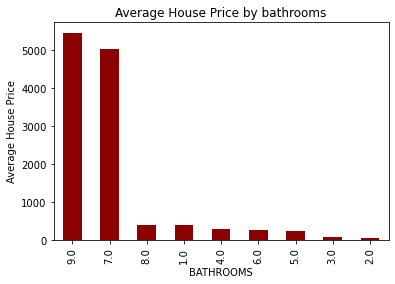

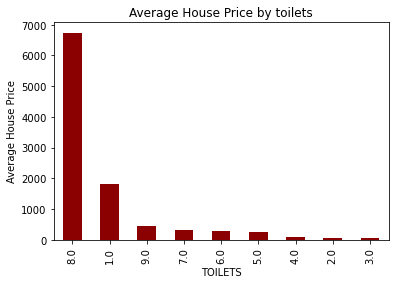

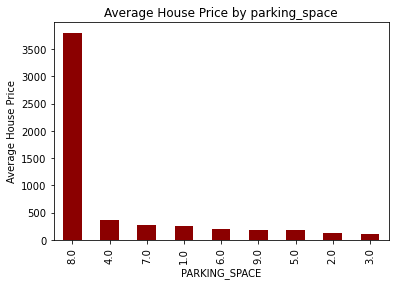

In [21]:
for i in num.iloc[:,:4].columns:
    plt.figure()
    (df.groupby(i)['price'].mean()/1e6).sort_values(ascending=False).plot.bar(color='darkred')
    plt.xlabel(i.upper())
    plt.ylabel('Average House Price')
    plt.title(f'Average House Price by {i}');

**Distribution of target variable**

<AxesSubplot:xlabel='price', ylabel='Density'>

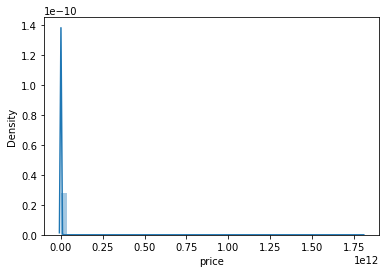

In [22]:
sns.distplot(df['price'])


The target variable is very skewed and has a lot of outliers. Lets try a log transformation of the target variable.

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='price', ylabel='Density'>

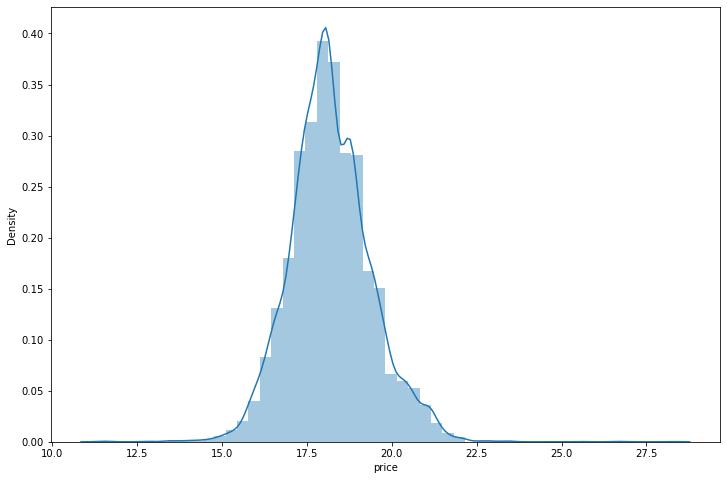

In [23]:
#distribution of continuous variable
plt.figure(figsize=(12,8))

sns.distplot(np.log(df['price']))


In [24]:
df['log_price']=np.log(df['price'])# log transformation of target variable

<AxesSubplot:>

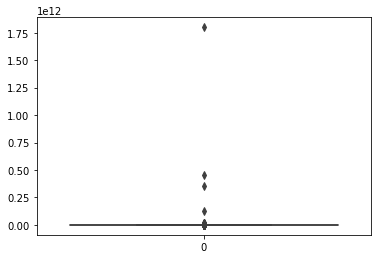

In [25]:
sns.boxplot(df['price'])


<AxesSubplot:>

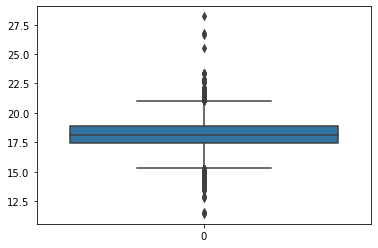

In [26]:
sns.boxplot(df['log_price'])


In [27]:
print('Price')
print('Skewness',df['price'].skew())
print('Kurtosis',df['price'].kurt())
Mean=round(df['price'].mean(),2)
Median=round(df['price'].median(),2)
print('Mean',Mean)
print('Median',Median)
if Mean>Median:
    print('Right Skewed')
else:
    print('Left Skewed')
    print('*****************************************************************************')
    print()

Price
Skewness 92.17994452482394
Kurtosis 9020.69255800467
Mean 427128174.13
Median 75000000.0
Right Skewed


The distplot and boxplot show the presence of outliers in the data. Are they due to errors or typos in the data collection process, or do they represent legitimate observations with unusually high or low values?



**Checking for linearity**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

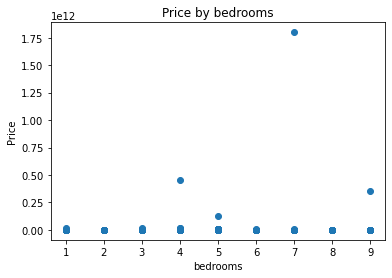

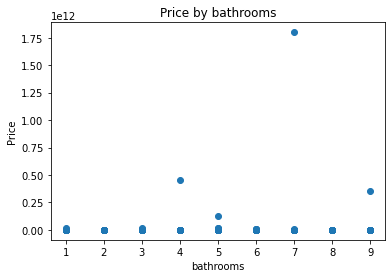

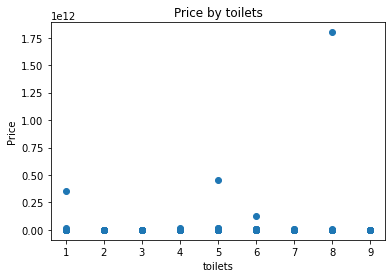

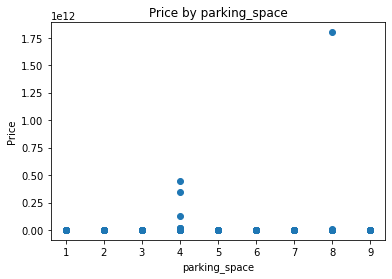

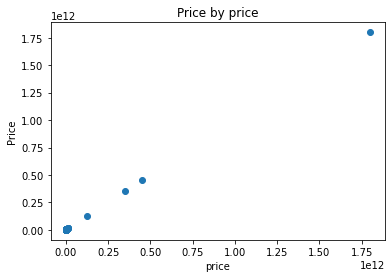

In [28]:
for i in num.columns:
    plt.figure()
    plt.scatter(df[i],df['price'])
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.title(f'Price by {i}')

**Checking for correlation and multicollinearity**

<AxesSubplot:>

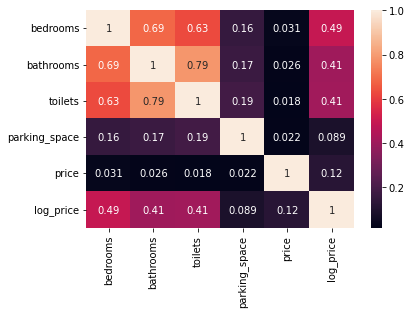

In [29]:
sns.heatmap(df.corr(),annot=True)

**Checking for normality**

In [30]:
from scipy.stats import shapiro

In [31]:
for i in num:
    print(i.upper())
    pvalue=stats.shapiro(df[i])[1]
    if pvalue<0.05:
        print('Null hypothesis rejected. Data is not normal')
    else:
        print('Null hypothesis accepted. Data is normal')
    print()

BEDROOMS


<IPython.core.display.Javascript object>

Null hypothesis rejected. Data is not normal

BATHROOMS


<IPython.core.display.Javascript object>

Null hypothesis rejected. Data is not normal

TOILETS


<IPython.core.display.Javascript object>

Null hypothesis rejected. Data is not normal

PARKING_SPACE


<IPython.core.display.Javascript object>

Null hypothesis rejected. Data is not normal

PRICE


<IPython.core.display.Javascript object>

Null hypothesis rejected. Data is not normal



## FEATURE ENGINEERING

**Should Outliers be removed?**

In [32]:
mini,maxi=df['price'].quantile([0.01,0.99])

mask = df['price'].between(mini,maxi)

df=df[mask]

<AxesSubplot:>

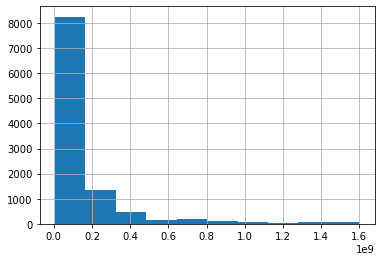

In [33]:
df.price.hist()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

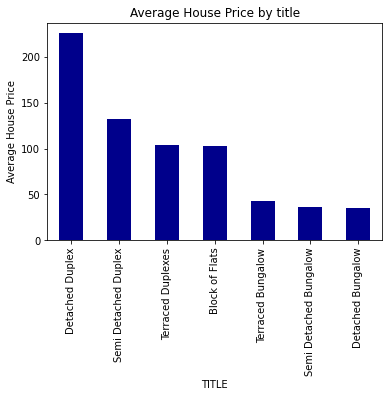

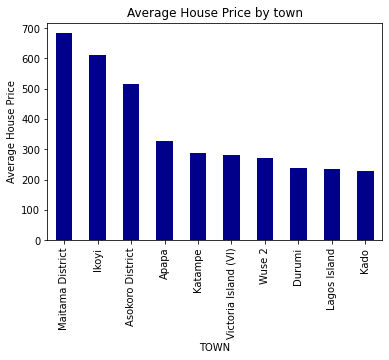

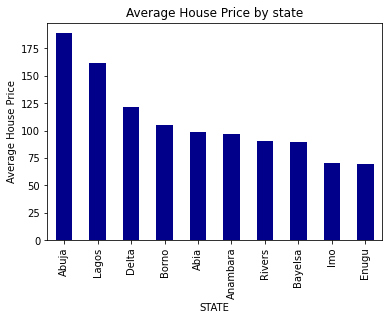

In [34]:
for i in cat.columns:
    plt.figure()
    (df.groupby(i)['price'].mean()/1e6).sort_values(ascending=False).head(10).plot.bar(color='darkblue')
    plt.xlabel(i.upper())
    plt.ylabel('Average House Price')
    plt.title(f'Average House Price by {i}');

**Should with high cardinality be treated by replacing values that are less than 1% with others?**

In [35]:
for m in cat:
    
    temp=df.groupby(m)['price'].count()/len(df)
    
    #features greater than 1%
    temp_df=temp[temp>0.01].index 
    
    #extract the feature if it is in temp_df(>1%) else replace with rare_var
    df[m]=np.where(df[m].isin(temp_df),df[m],'Others')
    

In [36]:
for a in df.select_dtypes('O').columns:
    print(a,df[a].nunique())

title 7
town 23
state 7


In [37]:
df['Total_rooms']= df['bedrooms'] + df['bathrooms'] + df['toilets']#creating a new column

**Should high cardinality variables like town and state be replaced with their populations instead?**

In [38]:
#importing dataset

town1=pd.read_csv("/Users/USER/Documents/DATASETS/Town_populations_nigeria.csv")
town1.rename(columns={'city':'town'},inplace=True)
town1=town1[['town','population']]

town2=pd.read_csv("/Users/USER/Documents/DATASETS/Town_populations_nigeria_2.csv")
town2.rename(columns={'city':'town','2022':'population'},inplace=True)
town2=town2[['town','population']]

town=pd.concat([town1,town2],axis=0)
town2.shape

map_town=dict(zip(town['town'],town['population']))

data_copy=data.copy()

data_copy['town']=data_copy['town'].map(map_town)

print('Towns with no population value:',data_copy['town'].map(map_town).isnull().sum())
data_copy.head()

Towns with no population value: 13888


,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,NaN,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,NaN,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,401272.0,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,NaN,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,401272.0,Lagos,75000000.0


**Power Transformer**

There are two popular approaches for such automatic power transforms; they are:

- Box-Cox Transform
- Yeo-Johnson Transform
The transformed training dataset can then be fed to a machine learning model to learn a predictive modeling task.

A hyperparameter, often referred to as lambda  is used to control the nature of the transform.

… statistical methods can be used to empirically identify an appropriate transformation. Box and Cox (1964) propose a family of transformations that are indexed by a parameter, denoted as lambda

Below are some common values for lambda:

- lambda = -1. is a reciprocal transform.
- lambda = -0.5 is a reciprocal square root transform.
- lambda = 0.0 is a log transform.
- lambda = 0.5 is a square root transform.
- lambda = 1.0 is no transform.

Source: https://machinelearningmastery.com/power-transforms-with-scikit-learn/


# EXPERIMENT 1
FEATURE ENGINEERING:
  - Power transformation of target variable
  - Reducing high cardinality by replacing values less than 10 with 'others'
  - Adding a new column
  - Encoding columns with OneHotEncoder

In [39]:
train_copy=train.copy()
test_copy=test.copy()



power = PowerTransformer(method='box-cox') 



ytrain=train_copy['price']
power.fit(ytrain.to_frame())

ytrain_1=power.transform(ytrain.to_frame())
xtrain_1=train_copy.drop(['price'],axis=1)




ytest=test_copy['price']
y_test_1 = power.transform(ytest.to_frame())
xtest_1 = test_copy.drop(['price'],axis=1)

<AxesSubplot:ylabel='Density'>

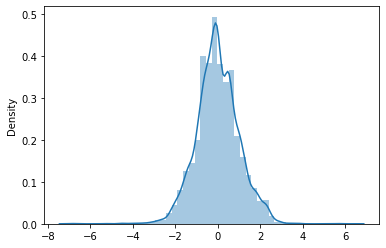

In [40]:
sns.distplot(ytrain_1)

# BASELINE MODEL 1

In [41]:
y_mean_1=ytrain_1.mean()

y_base=[y_mean_1]*len(ytrain_1)

base_mae=mean_absolute_error(y_base,ytrain_1)
print("Mean apt price:", y_mean_1)

print("Baseline MAE:", base_mae)

Mean apt price: -6.02319518965357e-16
Baseline MAE: 0.767510159682701


# MODEL BUILDING 1

In [42]:
def regression_model_1(model):
    
    model.fit(xtrain_1,ytrain_1)
    
    train_pred=model.predict(xtrain_1)
    
    # The .reshape(-1,1) method changes a numpy array into a numpy matrix with 1 column
    ridge_pred_reversed = power.inverse_transform(train_pred.reshape(-1,1))
    
    r2score=r2_score(ytrain_1,train_pred)
    
    mae=mean_absolute_error(train_pred,ytrain_1)
    
    mse=mean_squared_error(ytrain_1,train_pred)
    
    root_mean_squared_error=np.sqrt(mse)
    
    #to evaluate whether the RMSE is high or low, we can compare it with the standard deviation of the dependent variable. 
    # A RMSE value lower than the standard deviation indicates good model performance
    
    std=np.std(ytrain_1)
    
    normalised_rmse=root_mean_squared_error/(ytrain_1.max()- ytrain_1.min())
    
    
    n=xtrain_1.shape[0]
    p=xtrain_1.shape[1]
    adjusted_r2 = 1 - (1-r2score) *(n-1)/(n-p-1)
    
    
    
    
   
    print('Train_Mean_absolute_error','---',mae)
    print('Train_R2_score','---',r2score)
    print('Train_Mean_squared_error','---',mse)
    print('Train_Root_mean_squared_error','---',root_mean_squared_error)
    print('Standard deviation of dependent variable','---',std)

    print('Train_Adjusted_r2','---',adjusted_r2)
    print('Train_Normalised_rmse','---',normalised_rmse)
    print()
    print()
    
    
    sns.regplot(x=train_pred,y=ytrain_1)
    plt.title('Residual Plot')
    plt.xlabel('Predicted')
    plt.ylabel('Actual values')
    plt.show();
    
    stats=pd.DataFrame(ytrain_1)
    
    stats['Predicted']=train_pred
    
    stats.rename(columns={0:'Actual'},inplace=True)

    stats['Residuals']=stats['Actual'] - stats['Predicted']

    stats['Diff_in_%']=abs((stats['Residuals']/stats['Actual'])*100)



    #to view all data
    pd.options.display.max_rows=1000
    stats = stats.sort_values(by='Diff_in_%')
    print(stats)
    return model
    
    
def regression_weights_1(model):
    model.fit(xtrain_1,ytrain_1)
    
    coefficients=model.coef_
    
    intercept=model.intercept_
    
    return coefficients,intercept


# PIPELINE 1

In [43]:
target_variable=['price']

add_columns_variables=['bedrooms','bathrooms','toilets']

categorical_variables=['title','town','state']

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin

'''# Add a log transformation step to the pipeline
class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y):
        return self
    def transform(self, X, y=None):
        return np.log1p(X)'''
    

# Add a step to create new columns in the pipeline
class FeatureUp(BaseEstimator, TransformerMixin):
    def fit(self, X, y):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['total_rooms'] = X_copy['bedrooms'] + X_copy['bathrooms'] + X_copy['toilets']
        return X_copy

# Add a step to replace high cardinality variables with 'others' in the pipeline
class ReplaceHighCardinality(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=10):
        self.threshold = threshold
        
    def fit(self, X, y):
        return self
    
    #def transform(self, X, y=None):
     #   columns = np.array(X.select_dtypes(include="object").columns)
        
      #  u = np.array([X[x].nunique() for x in columns]) >= self.threshold
        
       # high_cardinal_col = columns[u]
        
        #X = X.copy().drop(columns=high_cardinal_col)
        # value_counts = xtrain[column].value_counts()
        # to_replace = value_counts[value_counts <= threshold].index
        # xtrain[column].replace(to_replace, 'others', inplace=True)
        #return X'''
    def transform(self,X,y=None):
        X_copy = X.copy()

        # Add a step to replace high cardinality variables with 'others' in the pipeline
        for i in X_copy.select_dtypes('O').columns:
            value_counts = X_copy[i].value_counts()
            to_replace = value_counts[value_counts <= self.threshold].index
            X_copy[i].replace(to_replace, 'others', inplace=True)
            return X_copy
        
        

# RIDGE REGRESSION

In [45]:

ridge=Ridge()

parameters={'alpha':[1e-15,1e-8,1e-3,1e-2,1,3,5,7,9,20,40,45,55,100]}

ridge_regressor_1=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
        

# Create the full pipeline
ridge_pipeline_1 = Pipeline(steps=[
    ('create_new_columns', FeatureUp()),
    ('replace_high_cardinality', ReplaceHighCardinality(threshold=10)),
    #('preprocessor', preprocessor),
    ('ohe',OneHotEncoder()),
    #('log_transformer', LogTransformer()),

    ('model', ridge_regressor_1),
])

# Fit the model

Train_Mean_absolute_error --- 0.4030830672438648
Train_R2_score --- 0.6511431357751158
Train_Mean_squared_error --- 0.3488568642248841
Train_Root_mean_squared_error --- 0.5906410620883754
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.650920386705557
Train_Normalised_rmse --- 0.044063864897086545




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

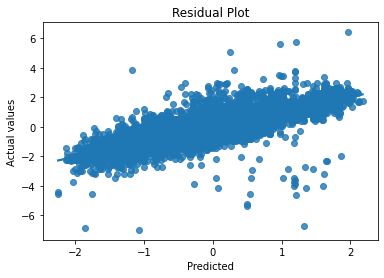

         Actual  Predicted     Residuals     Diff_in_%
31    -0.984500  -0.984501  8.857288e-07      0.000090
9507   0.521093   0.521108 -1.534031e-05      0.002944
1568   1.002941   1.002684  2.563370e-04      0.025559
7013  -0.566679  -0.566826  1.469114e-04      0.025925
10578 -0.372292  -0.372410  1.188322e-04      0.031919
...         ...        ...           ...           ...
8191  -0.003276   0.500722 -5.039975e-01  15386.765291
3020  -0.003276   0.505078 -5.083539e-01  15519.762950
5650  -0.003276   0.525465 -5.287401e-01  16142.141437
10596 -0.003276   0.609174 -6.124491e-01  18697.732715
8695  -0.003276  -0.810605  8.073290e-01  24647.306602

[10971 rows x 4 columns]


Pipeline(steps=[('create_new_columns', FeatureUp()),
                ('replace_high_cardinality', ReplaceHighCardinality()),
                ('ohe', OneHotEncoder(cols=['title', 'town', 'state'])),
                ('model',
                 GridSearchCV(cv=5, estimator=Ridge(),
                              param_grid={'alpha': [1e-15, 1e-08, 0.001, 0.01,
                                                    1, 3, 5, 7, 9, 20, 40, 45,
                                                    55, 100]},
                              scoring='neg_mean_squared_error'))])

In [46]:
regression_model_1(ridge_pipeline_1)

# LASSO REGRESSION

In [47]:
      
        
lasso=Lasso()
parameters={'alpha':[1e-15,1e-8,1e-3,1e-2,1,3,5,7,9,20,40,45,55,100]}

lasso_regressor_1=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
        


# Create the full pipeline
lasso_pipeline_1 = Pipeline(steps=[
    ('create_new_columns', FeatureUp()),
    ('replace_high_cardinality', ReplaceHighCardinality(threshold=10)),
    #('preprocessor', preprocessor),
    ('ohe',OneHotEncoder()),
    #('log_transformer', LogTransformer()),

    ('model', lasso_regressor_1),
])

# Fit the model

Train_Mean_absolute_error --- 0.39995894969779167
Train_R2_score --- 0.6553314539711856
Train_Mean_squared_error --- 0.34466854602881436
Train_Root_mean_squared_error --- 0.5870847860648531
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.6551113791903591
Train_Normalised_rmse --- 0.04379855441277452




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

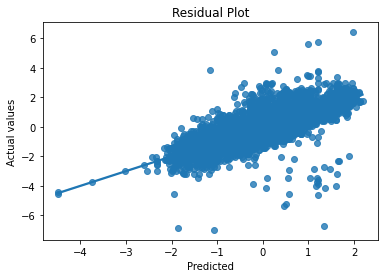

         Actual  Predicted  Residuals     Diff_in_%
1904   0.432002   0.431994   0.000008      0.001820
5099  -2.325833  -2.325778  -0.000055      0.002359
5233  -3.740416  -3.740307  -0.000109      0.002919
9903  -1.451818  -1.451763  -0.000055      0.003778
5731  -2.610037  -2.609935  -0.000103      0.003932
...         ...        ...        ...           ...
8191  -0.003276   0.498942  -0.502218  15332.426750
3020  -0.003276   0.504012  -0.507288  15487.219256
5650  -0.003276   0.525546  -0.528822  16144.639102
10596 -0.003276   0.636531  -0.639807  19532.943089
8695  -0.003276  -0.808563   0.805288  24584.986205

[10971 rows x 4 columns]


Pipeline(steps=[('create_new_columns', FeatureUp()),
                ('replace_high_cardinality', ReplaceHighCardinality()),
                ('ohe', OneHotEncoder(cols=['title', 'town', 'state'])),
                ('model',
                 GridSearchCV(cv=5, estimator=Lasso(),
                              param_grid={'alpha': [1e-15, 1e-08, 0.001, 0.01,
                                                    1, 3, 5, 7, 9, 20, 40, 45,
                                                    55, 100]},
                              scoring='neg_mean_squared_error'))])

In [48]:
regression_model_1(lasso_pipeline_1)

# ELASTIC NET REGRESSION

In [49]:
        
enet=ElasticNet()

parameters={'alpha':[1e-15,1e-8,1e-3,1e-2,0.1,1,3,5,7,9,20,40,45,55,100]}

enet_regressor_1=GridSearchCV(enet,parameters,scoring='neg_mean_squared_error',cv=5)
        

# Create the full pipeline
enet_pipeline_1 = Pipeline(steps=[
    ('create_new_columns', FeatureUp()),
    ('replace_high_cardinality', ReplaceHighCardinality(threshold=10)),
    #('preprocessor', preprocessor),
    ('ohe',OneHotEncoder()),
    #('log_transformer', LogTransformer()),

    ('model', enet_regressor_1),
])

# Fit the model

Train_Mean_absolute_error --- 0.3999589510410107
Train_R2_score --- 0.6553314538576307
Train_Mean_squared_error --- 0.34466854614236936
Train_Root_mean_squared_error --- 0.587084786161564
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.6551113790767316
Train_Normalised_rmse --- 0.043798554419989484




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

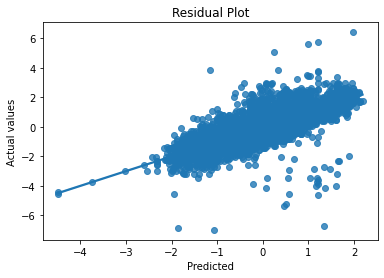

         Actual  Predicted  Residuals     Diff_in_%
9903  -1.451818  -1.451842   0.000024      0.001647
1904   0.432002   0.431995   0.000007      0.001698
5099  -2.325833  -2.325744  -0.000089      0.003816
2701  -2.325833  -2.325725  -0.000108      0.004655
4482  -2.046367  -2.046264  -0.000103      0.005047
...         ...        ...        ...           ...
8191  -0.003276   0.498942  -0.502218  15332.429227
3020  -0.003276   0.504013  -0.507288  15487.222043
5650  -0.003276   0.525546  -0.528822  16144.642865
10596 -0.003276   0.636531  -0.639807  19532.941313
8695  -0.003276  -0.808563   0.805288  24584.981035

[10971 rows x 4 columns]


Pipeline(steps=[('create_new_columns', FeatureUp()),
                ('replace_high_cardinality', ReplaceHighCardinality()),
                ('ohe', OneHotEncoder(cols=['title', 'town', 'state'])),
                ('model',
                 GridSearchCV(cv=5, estimator=ElasticNet(),
                              param_grid={'alpha': [1e-15, 1e-08, 0.001, 0.01,
                                                    0.1, 1, 3, 5, 7, 9, 20, 40,
                                                    45, 55, 100]},
                              scoring='neg_mean_squared_error'))])

In [50]:
regression_model_1(enet_pipeline_1)

# DECISION TREE REGRESSOR

In [51]:


 
tree_regressor_1=DecisionTreeRegressor()


# Create the full pipeline
tree_pipeline_1 = Pipeline(steps=[
    ('create_new_columns', FeatureUp()),
    ('replace_high_cardinality', ReplaceHighCardinality(threshold=10)),
    #('preprocessor', preprocessor),
    ('ohe',OneHotEncoder()),
    #('log_transformer', LogTransformer()),

    ('model', tree_regressor_1),
])

# Fit the model

Train_Mean_absolute_error --- 0.20063116397613504
Train_R2_score --- 0.85454118578372
Train_Mean_squared_error --- 0.14545881421628007
Train_Root_mean_squared_error --- 0.38139063205102464
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.8544483086789572
Train_Normalised_rmse --- 0.028453059501637297




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

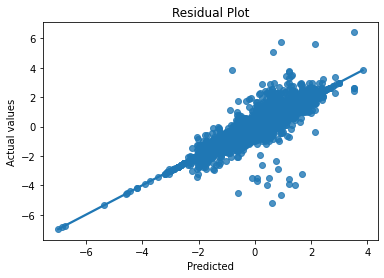

        Actual  Predicted  Residuals     Diff_in_%
0    -1.283422  -1.283422   0.000000      0.000000
5699 -1.142438  -1.142438   0.000000      0.000000
5697  1.629439   1.629439   0.000000      0.000000
5696 -0.984500  -0.984500   0.000000      0.000000
5694 -0.146957  -0.146957   0.000000      0.000000
...        ...        ...        ...           ...
815   0.007610   0.718241  -0.710632   9338.731645
450  -0.003276   0.386521  -0.389797  11900.285572
8191 -0.003276   0.594510  -0.597786  18250.074093
5650 -0.003276   0.617276  -0.620551  18945.080241
3020 -0.003276   0.630589  -0.633865  19351.542860

[10971 rows x 4 columns]


Pipeline(steps=[('create_new_columns', FeatureUp()),
                ('replace_high_cardinality', ReplaceHighCardinality()),
                ('ohe', OneHotEncoder(cols=['title', 'town', 'state'])),
                ('model', DecisionTreeRegressor())])

In [52]:
decision_tree_model_1=regression_model_1(tree_pipeline_1)
decision_tree_model_1

# XGBOOST REGRESSOR

### ABOUT XGBOOST
XGBoost was the first of The Big Three gradient boosting frameworks, released in 2014. The other two are LightGBM by Microsoft and launched in 2016, and CatBoost by Yandex, launched in 2017. Each of these frameworks are magnificent tools to tackling tabular data problems, using either regression or classification.


**What is 'boosting'?**<BR>
First there was a tree. The underlying element of these technique is the decision tree. Decision trees were one of the first algorithms, dating back to the 1980s with examples such as CART, and ID3, C4.5 and C5.0 by Quinlan. Trees are wonderfully intuitive leading to easily interpretable results. In view of this the most important hyperparameter for the DecisionTreeRegressor is the max_depth, although being a tree perhaps this should have really been called the maximum height... However, despite the appealing aspects such as few hyperparameters and interpretability, the drawback of decision trees is their high variance; a slight change in the input data can lead to a radically different tree structure. A similar thing can happen if there are collinear variables present. Sometimes individual decision trees are know as weak predictors, or weak learners.


Then we have a forest. As we all know, listening to many opinions and taking an average leads to a more balanced consensus. With this in mind, why not randomly plant a lot of trees and then ensemble them into one aggregate output. Each of the trees are slightly different in that they are grown from a subset (for example  n−−√  of  n ) of randomly selected features, which are taken from a "bootstrapped" copy of the dataset which consists of  ≈63%  samples taken (with replacement) from the original dataset. We now have the random forest, which outperforms the individual decision tree. 


 Random forests are great in reducing the variance with respect to a single decision tree, are particularly immune to overfitting, and are wonderful for obtaining a baseline score against which to compare more extravagant techniques. For more details see the introduction by Breiman and Cutler who invented the Random Forest in the early 2000's. With the RandomForestRegressor the most important hyperparameters are now max_depth as before, as well as n_estimators; which is the number of trees in the forest.

Gradient boosting. This time, instead of simultaneously planting a load of independent trees all at once at random (bootstrapping and aggregating aka. bagging), each successive tree that we plant is weighted in such a way as to compensate for any weakness (residual errors) in the previous tree. This is known as boosting. We have the hyperparameters max_depth, n_estimators as before, and now we have a learning_rate hyperparameter which is between 0 and 1, and controls the amount of shrinkage when creating each successive new tree.

GPU Useage: For large and computationally intensive problems XGBoost has GPU support and thus can be ran on GPU's rather than on the CPU. This can be done by using the parameter

XGBRegressor(tree_method='gpu_hist')
    
SOURCE: https://www.kaggle.com/code/carlmcbrideellis/an-introduction-to-xgboost-regression
    

In [53]:

        
xgb_=xgb.XGBRegressor()


parameters = {"max_depth":    [2,3,4,5,],
              "n_estimators": [80,100,150,200,500],
              "learning_rate": [0.0001,0.001,0.01, 0.015]}

# try out every combination of the above values
xgb_regressor_1 = GridSearchCV(xgb_, parameters, scoring='neg_mean_squared_error',cv=3)


# Create the full pipeline
xgb_pipeline_1 = Pipeline(steps=[
    ('create_new_columns', FeatureUp()),
    ('replace_high_cardinality', ReplaceHighCardinality(threshold=10)),
    #('preprocessor', preprocessor),
    ('ohe',OneHotEncoder()),
    #('log_transformer', LogTransformer()),

    ('model', xgb_regressor_1),
])

# Fit the model

Train_Mean_absolute_error --- 0.38848267706726697
Train_R2_score --- 0.6798215745687477
Train_Mean_squared_error --- 0.3201784254312523
Train_Root_mean_squared_error --- 0.565843110262246
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.6796171370080418
Train_Normalised_rmse --- 0.04221385197193111




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

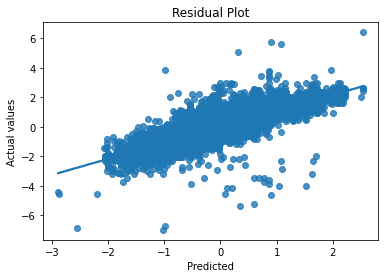

         Actual  Predicted  Residuals     Diff_in_%
2574  -0.736306  -0.736380   0.000073      0.009963
101   -0.736306  -0.736380   0.000073      0.009963
3483  -1.585251  -1.585019  -0.000232      0.014665
10336  0.215613   0.215663  -0.000049      0.022931
4990  -0.984500  -0.984139  -0.000361      0.036715
...         ...        ...        ...           ...
4885  -0.003276   0.316942  -0.320218   9776.075443
8695  -0.003276  -0.529928   0.526652  16078.401431
3020  -0.003276   0.594756  -0.598031  18257.556373
8191  -0.003276   0.594756  -0.598031  18257.556373
5650  -0.003276   0.594756  -0.598031  18257.556373

[10971 rows x 4 columns]


Pipeline(steps=[('create_new_columns', FeatureUp()),
                ('replace_high_cardinality', ReplaceHighCardinality()),
                ('ohe', OneHotEncoder(cols=['title', 'town', 'state'])),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enab...
                                                     max_depth=None,
                                                     max_leaves=None,
                        

In [54]:
regression_model_1(xgb_pipeline_1)

# EXPERIMENT 2
FEATURE ENGINEERING:
  - Removing outliers from the target variable
  - Reducing high cardinality by replacing values less than 10 with 'others'
  - Adding a new column
  - Encoding columns with OneHotEncoder

In [55]:
train_copy=train.copy()
test_copy=test.copy()

In [56]:
# Outlier removal
def Remove_Outliers(data):
    '''This function removes outliers from the data variable. 
    It filters out outliers above the 99th quantile and below 1st quantile'''

    mini,maxi=data['price'].quantile([0.01,0.99])

    mask = data['price'].between(mini,maxi)

    data=data[mask]
    return data

In [57]:
train_copy_2=Remove_Outliers(train_copy)

test_copy_2=Remove_Outliers(test_copy)


In [58]:
ytrain_2=train_copy_2['price']
xtrain_2=train_copy_2.drop(['price'],axis=1)

<AxesSubplot:xlabel='price', ylabel='Density'>

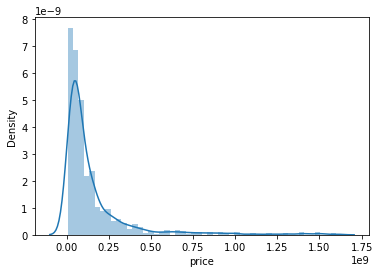

In [59]:
sns.distplot(ytrain_2)

# BASELINE MODEL 2

In [60]:
y_mean_2=ytrain_2.mean()

y_base=[y_mean_2]*len(ytrain_2)

base_mae=mean_absolute_error(y_base,ytrain_2)
print("Mean apt price:", y_mean_2)

print("Baseline MAE:", base_mae)

Mean apt price: 151785826.13367394
Baseline MAE: 133766259.24622248


# MODEL BUILDING 2

In [61]:
def regression_model_2(model):
    
    model.fit(xtrain_2,ytrain_2)
    
    train_pred=model.predict(xtrain_2)
    
    r2score=r2_score(ytrain_2,train_pred)
    
    mae=mean_absolute_error(train_pred,ytrain_2)
    
    mse=mean_squared_error(ytrain_2,train_pred)
    
     #to evaluate whether the RMSE is high or low, we can compare it with the standard deviation of the dependent variable. 
    # A RMSE value lower than the standard deviation indicates good model performance
    
    std=np.std(ytrain_1)
    
    root_mean_squared_error=np.sqrt(mse)
    
    normalised_rmse=root_mean_squared_error/(ytrain_2.max()- ytrain_2.min())
    
    
    n=xtrain_2.shape[0]
    p=xtrain_2.shape[1]
    adjusted_r2 = 1 - (1-r2score) *(n-1)/(n-p-1)
    
    
    
    
   
    print('Train_Mean_absolute_error','---',mae)
    print('Train_R2_score','---',r2score)
    print('Train_Mean_squared_error','---',mse)
    print('Train_Root_mean_squared_error','---',root_mean_squared_error)
    print('Standard deviation of dependent variable','---',std)

    print('Train_Adjusted_r2','---',adjusted_r2)
    print('Train_Normalised_rmse','---',normalised_rmse)
    print()
    print()
    
    
    sns.regplot(x=train_pred,y=ytrain_2)
    plt.title('Residual Plot')
    plt.xlabel('Predicted')
    plt.ylabel('Actual values')
    plt.show();
    
    stat=pd.DataFrame(ytrain_2)
    
    stat['Predicted']=train_pred
    
    stat.rename(columns={0:'Actual'},inplace=True)

    stat['Residuals']=stat.iloc[:,0] - stat['Predicted']

    stat['Diff_in_%']=abs((stat['Residuals']/stat.iloc[:,0])*100)



    #to view all data
    pd.options.display.max_rows=1000
    stat= stat.sort_values(by='Diff_in_%')
    print(stat)
    return model
    
def regression_weights(model):
    model.fit(xtrain_2,ytrain_2)
    
    coefficients=model.coef_
    
    intercept=model.intercept_
    
    return coefficients,intercept


# PIPELINE 2

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin

# Add a step to create new columns in the pipeline
class FeatureUp(BaseEstimator, TransformerMixin):
    def fit(self, X, y):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['total_rooms'] = X_copy['bedrooms'] + X_copy['bathrooms'] + X_copy['toilets']
        return X_copy

# Add a step to replace high cardinality variables with 'others' in the pipeline
class ReplaceHighCardinality(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=10):
        self.threshold = threshold
        
    def fit(self, X, y):
        return self
      
   
    def transform(self,X,y=None):
        X_copy = X.copy()

        # Add a step to replace high cardinality variables with 'others' in the pipeline
        for i in X_copy.select_dtypes('O').columns:
            value_counts = X_copy[i].value_counts()
            to_replace = value_counts[value_counts <= self.threshold].index
            X_copy[i].replace(to_replace, 'others', inplace=True)
            return X_copy


# RIDGE REGRESSION

In [63]:
      
ridge=Ridge()

parameters={'alpha':[1e-15,1e-8,1e-3,1e-2,1,3,5,7,9,20,40,45,55,100]}

ridge_regressor_2=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
        

# Create the full pipeline
ridge_pipeline_2 = Pipeline(steps=[
    ('create_new_columns', FeatureUp()),
    ('replace_high_cardinality', ReplaceHighCardinality(threshold=10)),
    #('preprocessor', preprocessor),
    ('oe',OneHotEncoder()),
    #('log_transformer', LogTransformer()),

    ('model', ridge_regressor_2),
])

# Fit the model

Train_Mean_absolute_error --- 84686678.42944816
Train_R2_score --- 0.5171772215432724
Train_Mean_squared_error --- 2.4721115052487436e+16
Train_Root_mean_squared_error --- 157229498.035475
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.5168630299053438
Train_Normalised_rmse --- 0.09863833000970827




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

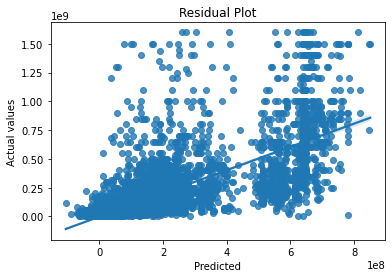

             price     Predicted     Residuals     Diff_in_%
5771    95000000.0  9.499970e+07  2.996775e+02      0.000315
17689  190000000.0  1.899926e+08  7.354820e+03      0.003871
23462  198000000.0  1.980245e+08 -2.451268e+04      0.012380
23186  195000000.0  1.950336e+08 -3.356972e+04      0.017215
7770    55000000.0  5.501527e+07 -1.527449e+04      0.027772
...            ...           ...           ...           ...
7302     6000000.0  1.660500e+08 -1.600500e+08   2667.499862
2640     7200000.0  2.848817e+08 -2.776817e+08   3856.690095
4839     8700000.0  7.803714e+08 -7.716714e+08   8869.786076
15947    6000000.0  6.250410e+08 -6.190410e+08  10317.349367
8623     6000000.0  6.398350e+08 -6.338350e+08  10563.916803

[10765 rows x 4 columns]


Pipeline(steps=[('create_new_columns', FeatureUp()),
                ('replace_high_cardinality', ReplaceHighCardinality()),
                ('oe', OneHotEncoder(cols=['title', 'town', 'state'])),
                ('model',
                 GridSearchCV(cv=5, estimator=Ridge(),
                              param_grid={'alpha': [1e-15, 1e-08, 0.001, 0.01,
                                                    1, 3, 5, 7, 9, 20, 40, 45,
                                                    55, 100]},
                              scoring='neg_mean_squared_error'))])

In [64]:
regression_model_2(ridge_pipeline_2)

# LASSO REGRESSION

In [65]:
      
        
lasso=Lasso()

parameters={'alpha':[1e-15,1e-8,1e-3,1e-2,1,3,5,7,9,20,40,45,55,100]}

lasso_regressor_2=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
        

# Create the full pipeline
lasso_pipeline_2 = Pipeline(steps=[
    ('create_new_columns', FeatureUp()),
    ('replace_high_cardinality', ReplaceHighCardinality(threshold=10)),
    #('preprocessor', preprocessor),
    ('oe',OneHotEncoder()),
    #('log_transformer', LogTransformer()),

    ('model', lasso_regressor_2),
])

# Fit the model

Train_Mean_absolute_error --- 84631554.83729953
Train_R2_score --- 0.5177742606632055
Train_Mean_squared_error --- 2.469054592146615e+16
Train_Root_mean_squared_error --- 157132256.14578998
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.5174604575419489
Train_Normalised_rmse --- 0.09857732506009409




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

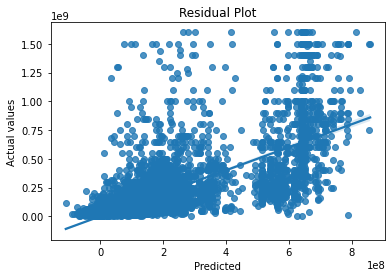

             price     Predicted     Residuals     Diff_in_%
5867   650000000.0  6.499958e+08  4.246321e+03      0.000653
20211  176020999.0  1.759977e+08  2.334145e+04      0.013261
9228   135000000.0  1.350333e+08 -3.326389e+04      0.024640
23186  195000000.0  1.950925e+08 -9.252656e+04      0.047450
9741   130000000.0  1.299358e+08  6.417741e+04      0.049367
...            ...           ...           ...           ...
20663   22000000.0  5.975253e+08 -5.755253e+08   2616.024036
2640     7200000.0  2.881100e+08 -2.809100e+08   3901.528260
4839     8700000.0  7.882463e+08 -7.795463e+08   8960.302738
15947    6000000.0  6.263888e+08 -6.203888e+08  10339.813066
8623     6000000.0  6.419909e+08 -6.359909e+08  10599.847848

[10765 rows x 4 columns]


Pipeline(steps=[('create_new_columns', FeatureUp()),
                ('replace_high_cardinality', ReplaceHighCardinality()),
                ('oe', OneHotEncoder(cols=['title', 'town', 'state'])),
                ('model',
                 GridSearchCV(cv=5, estimator=Lasso(),
                              param_grid={'alpha': [1e-15, 1e-08, 0.001, 0.01,
                                                    1, 3, 5, 7, 9, 20, 40, 45,
                                                    55, 100]},
                              scoring='neg_mean_squared_error'))])

In [66]:
regression_model_2(lasso_pipeline_2)

# ELASTIC NET REGRESSION

In [67]:

enet=ElasticNet()

parameters={'alpha':[1e-15,1e-8,1e-3,1e-2,1,3,5,7,9,20,40,45,55,100]}

enet_regressor_2=GridSearchCV(enet,parameters,scoring='neg_mean_squared_error',cv=5)
        

# Create the full pipeline
enet_pipeline_2 = Pipeline(steps=[
    ('create_new_columns', FeatureUp()),
    ('replace_high_cardinality', ReplaceHighCardinality(threshold=10)),
    #('preprocessor', preprocessor),
    ('oe',OneHotEncoder()),
    #('log_transformer', LogTransformer()),

    ('model', enet_regressor_2),
])

# Fit the model

Train_Mean_absolute_error --- 84725580.7243219
Train_R2_score --- 0.5166143324954355
Train_Mean_squared_error --- 2.4749935658171856e+16
Train_Root_mean_squared_error --- 157321122.7336363
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.5162997745636208
Train_Normalised_rmse --- 0.09869581099977183




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

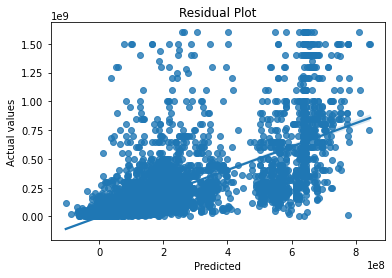

             price     Predicted     Residuals     Diff_in_%
5771    95000000.0  9.497319e+07  2.681079e+04      0.028222
3976    24000000.0  2.400758e+07 -7.581913e+03      0.031591
8214    70000000.0  6.997661e+07  2.339465e+04      0.033421
17750   65000000.0  6.502473e+07 -2.473466e+04      0.038053
23186  195000000.0  1.950783e+08 -7.830192e+04      0.040155
...            ...           ...           ...           ...
7302     6000000.0  2.006218e+08 -1.946218e+08   3243.696145
2640     7200000.0  2.826141e+08 -2.754141e+08   3825.196192
4839     8700000.0  7.749001e+08 -7.662001e+08   8806.897946
15947    6000000.0  6.236416e+08 -6.176416e+08  10294.027062
8623     6000000.0  6.380927e+08 -6.320927e+08  10534.878370

[10765 rows x 4 columns]


Pipeline(steps=[('create_new_columns', FeatureUp()),
                ('replace_high_cardinality', ReplaceHighCardinality()),
                ('oe', OneHotEncoder(cols=['title', 'town', 'state'])),
                ('model',
                 GridSearchCV(cv=5, estimator=ElasticNet(),
                              param_grid={'alpha': [1e-15, 1e-08, 0.001, 0.01,
                                                    1, 3, 5, 7, 9, 20, 40, 45,
                                                    55, 100]},
                              scoring='neg_mean_squared_error'))])

In [68]:
regression_model_2(enet_pipeline_2)

# DECISION TREE REGRESSOR

In [69]:


 
tree_regressor_2=DecisionTreeRegressor()


# Create the full pipeline
tree_pipeline_2 = Pipeline(steps=[
    ('create_new_columns', FeatureUp()),
    ('replace_high_cardinality', ReplaceHighCardinality(threshold=10)),
    #('preprocessor', preprocessor),
    ('ohe',OneHotEncoder()),
    #('log_transformer', LogTransformer()),

    ('model', tree_regressor_2),
])

# Fit the model

Train_Mean_absolute_error --- 38847503.6063349
Train_R2_score --- 0.8173680696445049
Train_Mean_squared_error --- 9350977551239760.0
Train_Root_mean_squared_error --- 96700452.69407874
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.817249223914981
Train_Normalised_rmse --- 0.06066527772526897




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

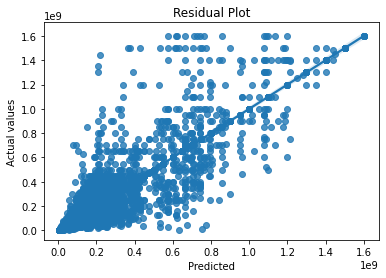

             price     Predicted     Residuals     Diff_in_%
23482   18000000.0  1.800000e+07  0.000000e+00      0.000000
6304    25000000.0  2.500000e+07  0.000000e+00      0.000000
13469   65000000.0  6.500000e+07  0.000000e+00      0.000000
19863  160000000.0  1.600000e+08  0.000000e+00      0.000000
16918   38000000.0  3.800000e+07  0.000000e+00      0.000000
...            ...           ...           ...           ...
14294   45000000.0  7.725000e+08 -7.275000e+08   1616.666667
12980   27000000.0  5.306667e+08 -5.036667e+08   1865.432099
22940   29000000.0  5.763333e+08 -5.473333e+08   1887.356322
4839     8700000.0  7.543500e+08 -7.456500e+08   8570.689655
8623     6000000.0  6.315000e+08 -6.255000e+08  10425.000000

[10765 rows x 4 columns]


Pipeline(steps=[('create_new_columns', FeatureUp()),
                ('replace_high_cardinality', ReplaceHighCardinality()),
                ('ohe', OneHotEncoder(cols=['title', 'town', 'state'])),
                ('model', DecisionTreeRegressor())])

In [70]:
regression_model_2(tree_pipeline_2)


# XGBOOST REGRESSION

In [71]:
        
xgb_=xgb.XGBRegressor()


parameters = {"max_depth":    [2,3,4,5,],
              "n_estimators": [80,100,150,200,500],
              "learning_rate": [0.0001,0.001,0.01, 0.015]}

# try out every combination of the above values
xgb_regressor_2 = GridSearchCV(xgb_, parameters, scoring='neg_mean_squared_error',cv=3)


# Create the full pipeline
xgb_pipeline_2 = Pipeline(steps=[
    ('create_new_columns', FeatureUp()),
    ('replace_high_cardinality', ReplaceHighCardinality(threshold=10)),
    #('preprocessor', preprocessor),
    ('ohe',OneHotEncoder()),
    #('log_transformer', LogTransformer()),

    ('model', xgb_regressor_2),
])

# Fit the model



Train_Mean_absolute_error --- 69632574.88936368
Train_R2_score --- 0.6495198355292574
Train_Mean_squared_error --- 1.794501182647179e+16
Train_Root_mean_squared_error --- 133958993.07800052
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.6492917643987104
Train_Normalised_rmse --- 0.08403951886951098




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

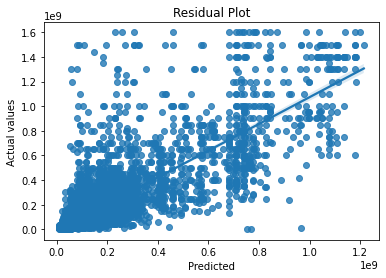

             price    Predicted    Residuals     Diff_in_%
12100  300000000.0  299922656.0      77344.0      0.025781
6138    45000000.0   45018824.0     -18824.0      0.041831
12387  150000000.0  149927968.0      72032.0      0.048021
14140  680000000.0  680342016.0    -342016.0      0.050296
5635   160000000.0  160091408.0     -91408.0      0.057130
...            ...          ...          ...           ...
2640     7200000.0  204008528.0 -196808528.0   2733.451778
1246     8000000.0  264073872.0 -256073872.0   3200.923400
4839     8700000.0  967157696.0 -958457696.0  11016.755126
15947    6000000.0  751684992.0 -745684992.0  12428.083200
8623     6000000.0  766495680.0 -760495680.0  12674.928000

[10765 rows x 4 columns]


Pipeline(steps=[('create_new_columns', FeatureUp()),
                ('replace_high_cardinality', ReplaceHighCardinality()),
                ('ohe', OneHotEncoder(cols=['title', 'town', 'state'])),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enab...
                                                     max_depth=None,
                                                     max_leaves=None,
                        

In [72]:
regression_model_2(xgb_pipeline_2)

# EXPERIMENT 3:
  - Log transformation of target variable
  - Reducing high cardinality by replacing values less than 15 with 'others'
  - Adding a new column
  - Encoding columns with OneHotEncoder

In [73]:
train_copy=train.copy()
test_copy=test.copy()




ytrain_3=np.log(train_copy['price'])

xtrain_3=train_copy.drop(['price'],axis=1)




ytest=np.log(test_copy['price'])
xtest_3= test_copy.drop(['price'],axis=1)

# BASELINE MODEL 3

In [74]:
y_mean_3=ytrain_3.mean()

y_base=[y_mean_3]*len(ytrain_3)

base_mae=mean_absolute_error(y_base,ytrain_3)
print("Mean apt price:", y_mean_3)

print("Baseline MAE:", base_mae)

Mean apt price: 18.204628791578198
Baseline MAE: 0.916056808472975


### MODEL BUILDING 3

In [75]:
def regression_model_3(model):
    
    model.fit(xtrain_3,ytrain_3)
    
    train_pred=model.predict(xtrain_3)
    
    r2score=r2_score(ytrain_3,train_pred)
    
    mae=mean_absolute_error(train_pred,ytrain_3)
    
    mse=mean_squared_error(ytrain_3,train_pred)
    
     #to evaluate whether the RMSE is high or low, we can compare it with the standard deviation of the dependent variable. 
    # A RMSE value lower than the standard deviation indicates good model performance
    
    std=np.std(ytrain_1)
    
    root_mean_squared_error=np.sqrt(mse)
    
    normalised_rmse=root_mean_squared_error/(ytrain_3.max()- ytrain_3.min())
    
    
    n=xtrain_3.shape[0]
    p=xtrain_3.shape[1]
    adjusted_r2 = 1 - (1-r2score) *(n-1)/(n-p-1)
    
    
    
    
   
    print('Train_Mean_absolute_error','---',mae)
    print('Train_R2_score','---',r2score)
    print('Train_Mean_squared_error','---',mse)
    print('Train_Root_mean_squared_error','---',root_mean_squared_error)
    print('Standard deviation of dependent variable','---',std)

    print('Train_Adjusted_r2','---',adjusted_r2)
    print('Train_Normalised_rmse','---',normalised_rmse)
    print()
    print()
    
    
    sns.regplot(x=train_pred,y=ytrain_3)
    plt.title('Residual Plot')
    plt.xlabel('Predicted')
    plt.ylabel('Actual values')
    plt.show();
    
    stat=pd.DataFrame(ytrain_3)
    
    stat['Predicted']=train_pred
    
    stat.rename(columns={0:'Actual'},inplace=True)

    stat['Residuals']=stat.iloc[:,0] - stat['Predicted']

    stat['Diff_in_%']=abs((stat['Residuals']/stat.iloc[:,0])*100)



    #to view all data
    pd.options.display.max_rows=1000
    stat= stat.sort_values(by='Diff_in_%')
    print(stat)
    
    return model 

def regression_weights(model):
    model.fit(xtrain_3,ytrain_3)
    
    coefficients=model.coef_
    
    intercept=model.intercept_
    
    return coefficients,intercept


### PIPELINE 3

In [76]:

from sklearn.base import BaseEstimator, TransformerMixin

'''# Add a log transformation step to the pipeline
class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y):
        return self
    def transform(self, X, y=None):
        return np.log1p(X)'''
    

# Add a step to create new columns in the pipeline
class FeatureUp(BaseEstimator, TransformerMixin):
    def fit(self, X, y):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['total_rooms'] = X_copy['bedrooms'] + X_copy['bathrooms'] + X_copy['toilets']
        return X_copy

# Add a step to replace high cardinality variables with 'others' in the pipeline
class ReplaceHighCardinality(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=15):
        self.threshold = threshold
        
    def fit(self, X, y):
        return self
    
    #def transform(self, X, y=None):
     #   columns = np.array(X.select_dtypes(include="object").columns)
        
      #  u = np.array([X[x].nunique() for x in columns]) >= self.threshold
        
       # high_cardinal_col = columns[u]
        
        #X = X.copy().drop(columns=high_cardinal_col)
        # value_counts = xtrain[column].value_counts()
        # to_replace = value_counts[value_counts <= threshold].index
        # xtrain[column].replace(to_replace, 'others', inplace=True)
        #return X'''
    def transform(self,X,y=None):
        X_copy = X.copy()

        # Add a step to replace high cardinality variables with 'others' in the pipeline
        for i in X_copy.select_dtypes('O').columns:
            value_counts = X_copy[i].value_counts()
            to_replace = value_counts[value_counts <= self.threshold].index
            X_copy[i].replace(to_replace, 'others', inplace=True)
            return X_copy
        
        

## DECISION TREE REGRESSION

In [77]:
tree_regressor_3 = DecisionTreeRegressor()
        

# Create the full pipeline
tree_pipeline_3 = Pipeline(steps=[
    ('create_new_columns', FeatureUp()),
    ('replace_high_cardinality', ReplaceHighCardinality(threshold=15)),
    #('preprocessor', preprocessor),
    ('ohe',OneHotEncoder()),
    #('log_transformer', LogTransformer()),

    ('model', tree_regressor_3),
])

# Fit the model

Train_Mean_absolute_error --- 0.2428629700609241
Train_R2_score --- 0.8484454869309025
Train_Mean_squared_error --- 0.2164080203771114
Train_Root_mean_squared_error --- 0.46519675447826525
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.8483487176531972
Train_Normalised_rmse --- 0.02767176461255436




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

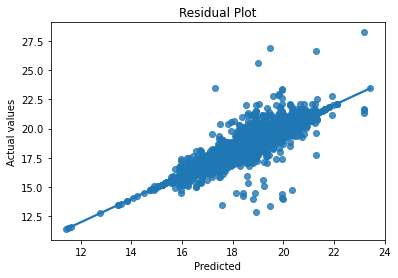

           price  Predicted  Residuals  Diff_in_%
23482  16.705882  16.705882   0.000000   0.000000
23195  18.858936  18.858936   0.000000   0.000000
19391  16.860033  16.860033   0.000000   0.000000
4401   20.212440  20.212440   0.000000   0.000000
6304   17.034386  17.034386   0.000000   0.000000
...          ...        ...        ...        ...
1053   14.375126  19.951729  -5.576603  38.793416
13433  14.077875  19.951729  -5.873854  41.724011
15169  13.997832  20.006484  -6.008651  42.925586
14555  13.399995  19.485590  -6.085595  45.414907
7083   12.899220  18.912115  -6.012895  46.614410

[10971 rows x 4 columns]


Pipeline(steps=[('create_new_columns', FeatureUp()),
                ('replace_high_cardinality', ReplaceHighCardinality()),
                ('ohe', OneHotEncoder(cols=['title', 'town', 'state'])),
                ('model', DecisionTreeRegressor())])

In [78]:
regression_model_3(tree_pipeline_3)

## RIDGE REGRESSION

In [79]:
ridge_regressor_3 = Ridge()
        

# Create the full pipeline
ridge_pipeline_3 = Pipeline(steps=[
    ('create_new_columns', FeatureUp()),
    ('replace_high_cardinality', ReplaceHighCardinality(threshold=10)),
    #('preprocessor', preprocessor),
    ('ohe',OneHotEncoder()),
    #('log_transformer', LogTransformer()),

    ('model', ridge_regressor_3),
])

# Fit the model

Train_Mean_absolute_error --- 0.4812498942195277
Train_R2_score --- 0.6524234695963038
Train_Mean_squared_error --- 0.4963121674899568
Train_Root_mean_squared_error --- 0.7044942636316898
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.6522015380344297
Train_Normalised_rmse --- 0.041906138094137874




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

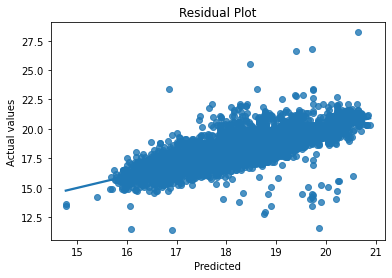

           price  Predicted  Residuals  Diff_in_%
23573  18.258162  18.258197  -0.000035   0.000191
12797  20.435584  20.435480   0.000104   0.000507
2475   17.147715  17.147498   0.000217   0.001268
13143  18.826146  18.826433  -0.000288   0.001528
22877  18.515991  18.516277  -0.000286   0.001544
...          ...        ...        ...        ...
7083   12.899220  18.780612  -5.881393  45.594948
17645  12.765688  18.752784  -5.987096  46.899905
14555  13.399995  19.721953  -6.321957  47.178804
2693   11.407565  16.903319  -5.495754  48.176399
2385   11.608236  19.871341  -8.263106  71.183133

[10971 rows x 4 columns]


Pipeline(steps=[('create_new_columns', FeatureUp()),
                ('replace_high_cardinality',
                 ReplaceHighCardinality(threshold=10)),
                ('ohe', OneHotEncoder(cols=['title', 'town', 'state'])),
                ('model', Ridge())])

In [80]:
regression_model_3(ridge_pipeline_3)

## ELASTIC NET REGRESSION

In [81]:
enet_regressor_3 = ElasticNet()
        

# Create the full pipeline
enet_pipeline_3 = Pipeline(steps=[
    ('create_new_columns', FeatureUp()),
    ('replace_high_cardinality', ReplaceHighCardinality(threshold=10)),
    #('preprocessor', preprocessor),
    ('ohe',OneHotEncoder()),
    #('log_transformer', LogTransformer()),

    ('model', enet_regressor_3),
])

# Fit the model

Train_Mean_absolute_error --- 0.7800841365482273
Train_R2_score --- 0.22142397874807274
Train_Mean_squared_error --- 1.1117458138339869
Train_Root_mean_squared_error --- 1.054393576343287
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.2209268491166977
Train_Normalised_rmse --- 0.0627195494652231




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

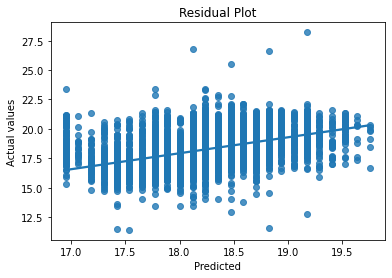

           price  Predicted  Residuals  Diff_in_%
6169   18.119576  18.120919  -0.001343   0.007414
13527  18.119576  18.120919  -0.001343   0.007414
12928  18.826146  18.824748   0.001397   0.007423
1305   18.826146  18.824748   0.001397   0.007423
23563  18.826146  18.824748   0.001397   0.007423
...          ...        ...        ...        ...
7083   12.899220  18.472834  -5.573614  43.208923
17645  12.765688  19.176663  -6.410975  50.220361
20146  11.512925  17.417090  -5.904164  51.282918
2693   11.407565  17.534394  -6.126830  53.708478
2385   11.608236  18.824748  -7.216513  62.167181

[10971 rows x 4 columns]


Pipeline(steps=[('create_new_columns', FeatureUp()),
                ('replace_high_cardinality',
                 ReplaceHighCardinality(threshold=10)),
                ('ohe', OneHotEncoder(cols=['title', 'town', 'state'])),
                ('model', ElasticNet())])

In [82]:
regression_model_3(enet_pipeline_3)

## XGBOOST REGRESSION

In [83]:
xgb_regressor_3 = xgb.XGBRegressor()
        

# Create the full pipeline
xgb_pipeline_3 = Pipeline(steps=[
    ('create_new_columns', FeatureUp()),
    ('replace_high_cardinality', ReplaceHighCardinality(threshold=10)),
    #('preprocessor', preprocessor),
    ('ohe',OneHotEncoder()),
    #('log_transformer', LogTransformer()),

    ('model', xgb_regressor_3),
])

# Fit the model

Train_Mean_absolute_error --- 0.40713440688365016
Train_R2_score --- 0.7400296298967968
Train_Mean_squared_error --- 0.3712174056148959
Train_Root_mean_squared_error --- 0.609276132484193
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.7398636358631634
Train_Normalised_rmse --- 0.03624218260305551




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

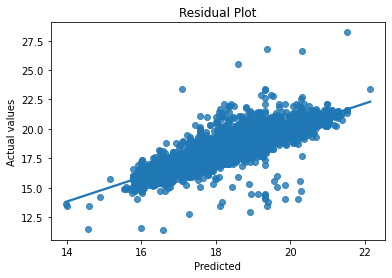

           price  Predicted  Residuals  Diff_in_%
4983   18.315320  18.315420  -0.000100   0.000546
3254   18.420681  18.420807  -0.000126   0.000685
15828  19.924758  19.925030  -0.000272   0.001363
12234  18.683045  18.682665   0.000380   0.002035
3737   17.370859  17.371225  -0.000367   0.002111
...          ...        ...        ...        ...
1491   13.997832  19.874172  -5.876340  41.980358
15169  13.997832  20.208096  -6.210263  44.365895
14555  13.399995  19.365412  -5.965417  44.518051
2693   11.407565  16.580132  -5.172567  45.343302
7083   12.899220  18.914330  -6.015110  46.631578

[10971 rows x 4 columns]


Pipeline(steps=[('create_new_columns', FeatureUp()),
                ('replace_high_cardinality',
                 ReplaceHighCardinality(threshold=10)),
                ('ohe', OneHotEncoder(cols=['title', 'town', 'state'])),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, e...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                

In [84]:
regression_model_3(xgb_pipeline_3)

# MODEL SELECTION AND TESTING

In [85]:
ytest=test_copy['price']
y_test = power.transform(ytest.to_frame())
xtest= test_copy.drop(['price'],axis=1)

In [86]:
test_pred = decision_tree_model_1.predict(xtest)

Train_Mean_absolute_error --- 298987093.93791175
Train_R2_score --- -0.0064392633787566655
Train_Mean_squared_error --- 1.397192560873477e+19
Train_Root_mean_squared_error --- 3737903905.7652044
Standard deviation of dependent variable --- 3725927042.592078
Train_Adjusted_r2 --- -0.008861083538141745
Train_Normalised_rmse --- 0.02336195051529928




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

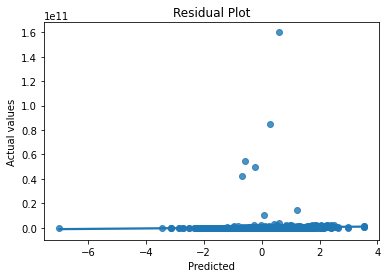

KeyError: 'Actual'

In [88]:
r2score=r2_score(ytest,test_pred)

mae=mean_absolute_error(test_pred,ytest)

mse=mean_squared_error(ytest,test_pred)

root_mean_squared_error=np.sqrt(mse)

#to evaluate whether the RMSE is high or low, we can compare it with the standard deviation of the dependent variable. 
# A RMSE value lower than the standard deviation indicates good model performance

std=np.std(ytest)

normalised_rmse=root_mean_squared_error/(ytest.max()- ytest.min())


n=xtest.shape[0]
p=xtest.shape[1]
adjusted_r2 = 1 - (1-r2score) *(n-1)/(n-p-1)





print('Train_Mean_absolute_error','---',mae)
print('Train_R2_score','---',r2score)
print('Train_Mean_squared_error','---',mse)
print('Train_Root_mean_squared_error','---',root_mean_squared_error)
print('Standard deviation of dependent variable','---',std)

print('Train_Adjusted_r2','---',adjusted_r2)
print('Train_Normalised_rmse','---',normalised_rmse)
print()
print()


sns.regplot(x=test_pred,y=ytest)
plt.title('Residual Plot')
plt.xlabel('Predicted')
plt.ylabel('Actual values')
plt.show();

stats=pd.DataFrame(ytest)

stats['Predicted']=test_pred

stats.rename(columns={0:'Actual'},inplace=True)

stats['Residuals']=stats['Actual'] - stats['Predicted']

stats['Diff_in_%']=abs((stats['Residuals']/stats['Actual'])*100)



#to view all data
pd.options.display.max_rows=1000
stats = stats.sort_values(by='Diff_in_%')
print(stats)




In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
bedrooms_ix, bathrooms_ix, toilets_ix, parking_space_ix, title_ix, town_ix, state_ix,price_ix= 0,1,2,3,4,5,6,7
class Feature_engineering(BaseEstimator, TransformerMixin):
    
    def __init__(self, change_values = True): # no *args or **kwargs
        self.change_values = change_values 
        
    def fit(self, X, y=None):
        return self # nothing else to do 
    
    def transform(self, X, y=None):
        
        q9=np.quantile(X[:,price_ix],0.99)#removing outliers
        q1=np.quantile(X[:,price_ix],0.01)

        X=X[(X[:,price_ix]>q1) & (X[:,price_ix]<q9)]#masking outliers
      
        total_rooms=(X[:,bedrooms_ix] + X[:,bathrooms_ix] + X[:,toilets_ix])#adding a new column
        
        X = pd.DataFrame(X)

        cat=X.iloc[:,4:7]
        
        for m in cat:
            temp=X[m].value_counts(normalize=True)
            #features greater than 1%
            
            temp_df=temp[temp>0.01].index 
            #extract the feature if it is in temp_df(>1%) else replace with rare_var
            
            X[m]=np.where(X[m].isin(temp_df),X[m],'Others')

    
    
        
        X.drop([X.iloc[:,price_ix]],inplace=True)
        if self.change_values:

            #df=np.delete(X,[sex_ix, smoker_ix, region_ix],axis=1)
            return np.c_[X,total_rooms]
        else:
            return X


In [ ]:
attr_adder = Feature_engineering(change_values = True)
r=attr_adder.transform(df.values)
print(pd.DataFrame(r))

In [ ]:
target=train['price']
labels=train.drop(['price'],axis=1)

In [ ]:
lr_pipeline=make_pipeline(Feature_engineering(change_values = True),OneHotEncoder(),Ridge())


In [ ]:
lr_pipeline.fit(target,labels)




Recommendations:
The features appear to add most value are the ones highly positively correlated with SalePrice. The bigger the house, garage, living area, the more expensive the house.
The better the quality of the house kitchen, exterior, and overall; the pricier the house. Also the worse those are, the cheaper the house would sell.
Homeowners can revamp and fix their homes to sell for more, to enhance the quality and condition of exterior, kitchen, and overall.
Top 5 highest prices average, by neighborhoor, came out to be: neighborhood StoneBr 329675.737 NridgHt 322831.352 NoRidge 316294.125 GrnHill 280000.000 Veenker 253570.588 Therefore, I would say, these neighbourhoods are good investment.
I think this model can be generalized to other cities, there’s no variables I thought specific to Aimes, Iowa. That is because I didn’t incorporate the neighbourhoods in my model.
